# 📊 Tendencias de Texto Web con Python

Este notebook es un experimento personal donde utilizo Python para:
- Obtener contenido textual de un artículo web (scraping)
- Procesar y limpiar el texto
- Analizar las palabras más frecuentes
- Visualizar los resultados con gráficos y nube de palabras

Este análisis puede ser útil para detectar temas recurrentes, crear resúmenes automáticos o entrenar modelos de lenguaje.

---

## Carga de librerías

In [17]:
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Scraping del artículo

In [ ]:
def fetch_article(url: str) -> str:
    try:
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Error: {response.status_code}")
            return ""
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        text = " ".join([p.get_text() for p in paragraphs])
        return text

    except Exception as e:
        print("Error al obtener el artículo:", e)
        return ""

In [3]:
# URL de ejemplo
url = "http://bbc.com/mundo/articles/c04551g4nk9o"
text = fetch_article(url)

# Preview del texto
print(text[:500])


Fuente de la imagen, Getty Images Durante días, Donald Trump y su equipo de la Casa Blanca insistieron en su firme compromiso con su decisión de imponer aranceles "recíprocos" generalizados a docenas de países.  Incluso ridiculizaron una información surgida el martes que indicaba que el presidente estaba considerando una pausa de 90 días para los aranceles, noticia que desencadenó un breve repunte en la bolsa. Pero ahora esa pausa de 90 días en el aumento de los aranceles, con algunas excepcione


## Limpieza y análisis

In [ ]:
def clean_text(raw_text: str) -> list[str]:
    raw_text = raw_text.lower()
    raw_text = re.sub(r"[^a-záéíóúñ\s]", "", raw_text)
    words = raw_text.split()
    stopwords = {
        "de",
        "la",
        "que",
        "el",
        "en",
        "los",
        "las",
        "por",
        "del",
        "se",
        "con",
        "una",
        "como",
        "más",
        "para",
        "sus",
        "entre",
        "pero",
    }
    words = [word for word in words if word not in stopwords and len(word) > 3]
    return words


def count_words(words: list[str]) -> list[tuple[str, int]]:
    return Counter(words).most_common(20)

In [5]:
words = clean_text(text)
word_frequency = count_words(words)
word_frequency

[('trump', 14),
 ('aranceles', 10),
 ('está', 9),
 ('días', 5),
 ('casa', 5),
 ('blanca', 5),
 ('presidente', 5),
 ('comercial', 4),
 ('semana', 4),
 ('fuente', 3),
 ('imagen', 3),
 ('getty', 3),
 ('images', 3),
 ('durante', 3),
 ('decisión', 3),
 ('países', 3),
 ('pausa', 3),
 ('china', 3),
 ('estadounidense', 3),
 ('prensa', 3)]

## Visualización

In [6]:
def graph_bars(word_counts):
    words, frecs = zip(*word_counts)
    plt.figure(figsize=(10, 5))
    plt.bar(words, frecs)
    plt.xticks(rotation=45)
    plt.title("Palabras más frecuentes")
    plt.tight_layout()
    plt.show()


def generate_word_cloud(words):
    text = " ".join(words)
    cloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Nube de palabras")
    plt.show()

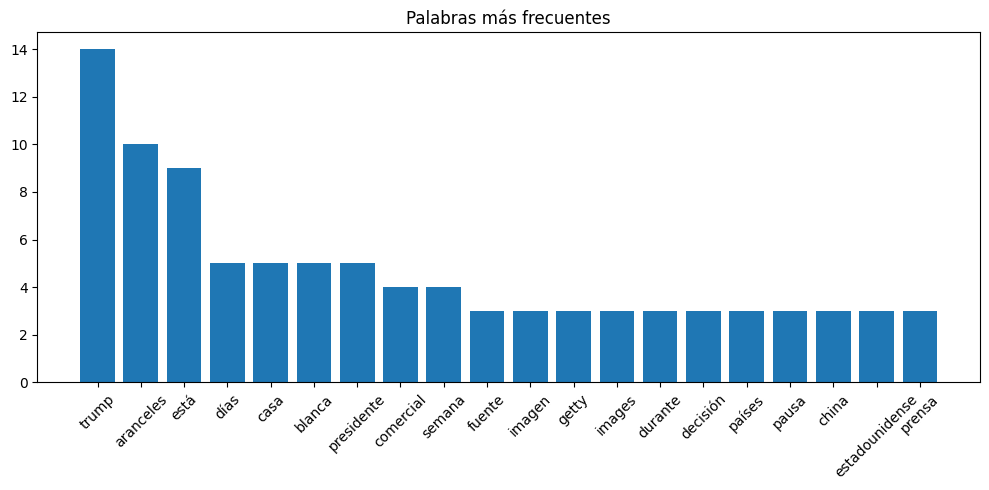

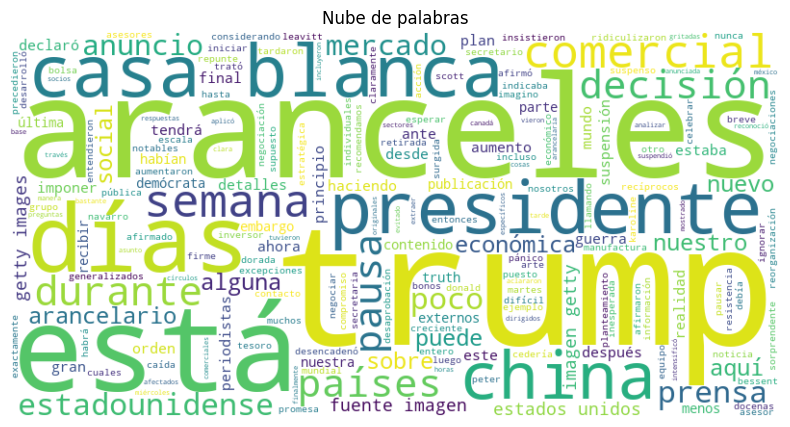

In [7]:
graph_bars(word_frequency)
generate_word_cloud(words)

## Uso de la lematización

In [8]:
import spacy

# Cargar el modelo de español
nlp = spacy.load("es_core_news_sm")

# Procesar el texto con spaCy
doc = nlp(text)

### Lematización en proceso

In [ ]:
lemas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]

lemas[:20]

['Fuente',
 'imagen',
 'Getty',
 'Images',
 'Donald',
 'Trump',
 'equipo',
 'Casa',
 'Blanca',
 'insistir',
 'firme',
 'compromiso',
 'decisión',
 'imponer',
 'arancel',
 'recíproco',
 'generalizado',
 'docena',
 'país',
 'ridiculizar']

### Conteo de lemas

In [ ]:
lemmas_count = Counter(lemas).most_common(20)
lemmas_count

[('Trump', 14),
 ('arancel', 10),
 ('Casa', 5),
 ('Blanca', 5),
 ('presidente', 5),
 ('comercial', 5),
 ('económico', 4),
 ('arancelario', 4),
 ('semana', 4),
 ('Fuente', 3),
 ('imagen', 3),
 ('Getty', 3),
 ('Images', 3),
 ('decisión', 3),
 ('imponer', 3),
 ('país', 3),
 ('pausa', 3),
 ('China', 3),
 ('estadounidense', 3),
 ('prensa', 3)]

### Detección de entidades nombradas (NER)

In [ ]:
for entity in doc.ents:
    print(entity.text, "→", entity.label_)

Getty Images Durante días → MISC
Donald Trump → PER
la Casa Blanca → LOC
Pero ahora esa pausa de 90 días → MISC
China → LOC
La reorganización del orden económico mundial está → MISC
Trump → PER
La Casa Blanca → LOC
Más de 75 países → MISC
Tesoro → LOC
Scott Bessent → PER
Final de Recomendamos Ese planteamiento de la Casa Blanca → MISC
¿Se → MISC
Trump → PER
Fuente de la imagen → MISC
Getty Images → MISC
Trump → PER
Peter Navarro → PER
Trump → PER
Trump → PER
Karoline Leavitt → PER
Estados Unidos → LOC
Trump → PER
China → LOC
Casa Blanca → LOC
Trump → PER
Truth Social → PER
UE? → ORG
México → LOC
Canadá → LOC
Estados Unidos → LOC
Trump → PER
Truth Social → LOC
Casa Blanca → LOC
Getty Images → MISC
Trump → PER
Sin embargo → MISC
Los demócratas → MISC
El líder de la minoría del Senado → MISC
Chuck Schumer → PER
Trump → PER
Al final → MISC
Trump → PER
La realidad → MISC
Estados Unidos → LOC
Está → MISC
China → LOC
Joe Biden → PER
La gran incógnita → MISC
Trump → PER
Trump → PER
Haz → MISC


### Guardando entidades en modo JSON

In [21]:
import json

entities = [{"text": ent.text, "type": ent.ent_type_} for ent in doc]

with open("data/entidades.json", "w", encoding="utf-8") as f:
    json.dump(entities, f, indent=2, ensure_ascii=False)
